In [12]:
import numpy as np
import random

import torch
from torch import nn
from torch.utils import data

import utils

### Linear Regression Implementation from Scratch

Generate Data

torch.Size([1000, 2]) torch.Size([1000])


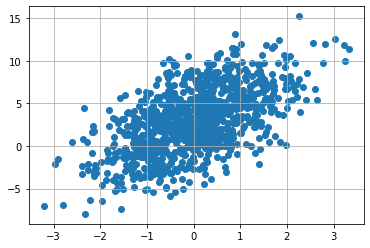

In [2]:
def generate_data(w_true, b_true, num):
    '''use true value get datum with noise'''
    X = torch.normal(0, 1, (num, len(w_true)))
    Y = X @ w_true.reshape(-1, 1) + b_true
    noise = torch.normal(0, 0.001, Y.shape)
    Y += noise
    return X, Y.reshape(-1)

w_true = torch.FloatTensor([2.0, 3.0])
b_true = torch.tensor(3.0)
num = 1000
feature, label = generate_data(w_true, b_true, num)
print(feature.shape, label.shape)
utils.plot(feature[:, 0], label, scatter=True)

Get Minibatch

In [3]:
def data_iter(feature, label, batch_size):
    num_examples = len(label)
    indices = list(range(num_examples))
    random.shuffle(indices)
    
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        yield feature[batch_indices], label[batch_indices]
        
for X, y in data_iter(feature, label, 10):
    print(X, '\n', y)
    break

tensor([[-0.0564,  1.8220],
        [-0.9211, -1.2822],
        [ 0.0089, -0.0880],
        [-1.3053, -0.5886],
        [-0.0514, -0.6786],
        [-0.9117,  1.0980],
        [ 0.3776,  0.5434],
        [ 2.5602,  1.3236],
        [ 0.9211, -1.5411],
        [ 1.0716, -0.9159]]) 
 tensor([ 8.3529, -2.6890,  2.7533, -1.3763,  0.8625,  4.4716,  5.3845, 12.0907,
         0.2175,  2.3946])


Linear Model

In [4]:
def LinearReg(X, w, b):
    return X @ w.reshape(-1, 1) + b

w = torch.normal(0, 1, (2,))
b = torch.normal(0, 1, (1,))
print(w, b)
LinearReg(torch.arange(6.0).reshape(-1, 2), w, b)

tensor([1.8261, 0.6110]) tensor([2.0266])


tensor([[ 2.6376],
        [ 7.5119],
        [12.3862]])

Loss Function: MSE

In [5]:
def MSE(y_hat, y):
    return (0.5 * (y_hat - y.reshape(y_hat.shape))**2).mean()

y_hat = torch.arange(5)
y = torch.zeros(5)
MSE(y_hat, y)

tensor(3.)

Optimization: SGD

In [6]:
def SGD(params, lr):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad
            param.grad.zero_()

Train

In [7]:
w = torch.normal(0, 1, (2,), requires_grad = True)
b = torch.normal(0, 1, (1,), requires_grad = True)

epochs = 10
batch_size = 100
lr = 0.1

for epoch in range(epochs):
    for X, y in data_iter(feature, label, batch_size):
        y_hat = LinearReg(X, w, b)
        loss = MSE(y_hat, y)
        loss.backward()
        SGD([w, b], lr)
    with torch.no_grad():
        train_l = MSE(LinearReg(feature, w, b), label)
        print(f'epoch: {epoch}, loss: {float(train_l)}')

epoch: 0, loss: 0.8544938564300537
epoch: 1, loss: 0.0949183851480484
epoch: 2, loss: 0.010604551993310452
epoch: 3, loss: 0.0011927346931770444
epoch: 4, loss: 0.00013492695870809257
epoch: 5, loss: 1.569022970215883e-05
epoch: 6, loss: 2.210637148891692e-06
epoch: 7, loss: 6.677622650386184e-07
epoch: 8, loss: 4.971516318619251e-07
epoch: 9, loss: 4.752605207158922e-07


In [8]:
w, b

(tensor([1.9999, 3.0000], requires_grad=True),
 tensor([3.0000], requires_grad=True))

### Concise Implementation of Linear Regression

Get Data Iter

In [14]:
def load_array(arrays, batch_size):
    dataset = data.TensorDataset(*arrays)
    return data.DataLoader(dataset, batch_size)

Data_iter = load_array((feature, label),batch_size)

Model, Loss and Optimization

In [13]:
LinModel = nn.Sequential(
    nn.Linear(2, 1)
)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(LinModel.parameters(), lr)

Train

In [21]:
for epoch in range(epochs):
    for X, y in Data_iter:
        loss = loss_fn(LinModel(X).reshape(y.shape), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        train_l = loss_fn(LinModel(feature).reshape(-1), label)
        print(f'epoch: {epoch}, loss: {float(train_l)}')

epoch: 0, loss: 0.2671566307544708
epoch: 1, loss: 0.0026076959911733866
epoch: 2, loss: 2.7117213903693482e-05
epoch: 3, loss: 1.2232358130859211e-06
epoch: 4, loss: 9.504038303020934e-07
epoch: 5, loss: 9.466467645324883e-07
epoch: 6, loss: 9.46484362884803e-07
epoch: 7, loss: 9.465237553740735e-07
epoch: 8, loss: 9.465258585805714e-07
epoch: 9, loss: 9.465258585805714e-07


In [22]:
LinModel[0].weight.data, LinModel[0].bias.data

(tensor([[2.0000, 3.0000]]), tensor([3.0001]))

### Softmax Regression Implementation from Scratch

### Concise Implementation of Softmax Regression